In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('E:/csv/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
dataset.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
dataset=dataset.drop(['car name'],axis=1)
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
dataset.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [7]:
print(dataset.cylinders.unique())
print(dataset.origin.unique())

[8 4 6 3 5]
[1 3 2]


In [8]:
def cylinder_map(x):
    return x.map({3:"cyl_3",5:"cyl_5",6:"cyl_6",4:"cyl_4",8:"cyl_8"})
dataset[['cylinders']]=dataset[['cylinders']].apply(cylinder_map)
dataset.head()
cylinders=pd.get_dummies(dataset.cylinders,drop_first=True)
cylinders.head(5)

,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [9]:
def origin_map(x):
    return x.map({3:"origin_x",2:"origin_y",1:"origin_z"})
dataset[['origin']]=dataset[["origin"]].apply(origin_map)
dataset.head()
origin=pd.get_dummies(dataset.origin,drop_first=True)
origin.head(5)

,origin_y,origin_z
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
dataset=pd.concat([dataset,cylinders,origin],axis=1)
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
0,18.0,cyl_8,307.0,130,3504,12.0,70,origin_z,0,0,0,1,0,1
1,15.0,cyl_8,350.0,165,3693,11.5,70,origin_z,0,0,0,1,0,1
2,18.0,cyl_8,318.0,150,3436,11.0,70,origin_z,0,0,0,1,0,1
3,16.0,cyl_8,304.0,150,3433,12.0,70,origin_z,0,0,0,1,0,1
4,17.0,cyl_8,302.0,140,3449,10.5,70,origin_z,0,0,0,1,0,1


In [11]:
dataset=dataset.drop(['cylinders','origin'],axis=1)
dataset.head(5)

,mpg,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
0,18.0,307.0,130,3504,12.0,70,0,0,0,1,0,1
1,15.0,350.0,165,3693,11.5,70,0,0,0,1,0,1
2,18.0,318.0,150,3436,11.0,70,0,0,0,1,0,1
3,16.0,304.0,150,3433,12.0,70,0,0,0,1,0,1
4,17.0,302.0,140,3449,10.5,70,0,0,0,1,0,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   cyl_4         398 non-null    uint8  
 7   cyl_5         398 non-null    uint8  
 8   cyl_6         398 non-null    uint8  
 9   cyl_8         398 non-null    uint8  
 10  origin_y      398 non-null    uint8  
 11  origin_z      398 non-null    uint8  
dtypes: float64(3), int64(2), object(1), uint8(6)
memory usage: 21.1+ KB


In [13]:
dataset.horsepower.values# has some undefined values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [14]:
dataset=dataset.replace('?','NaN')
dataset['horsepower']=dataset['horsepower'].astype(float)
m=dataset['horsepower'].mean()
m

104.46938775510205

In [15]:
dataset['horsepower']=dataset['horsepower'].fillna(m)
dataset['horsepower'].values

array([130.        , 165.        , 150.        , 150.        ,
       140.        , 198.        , 220.        , 215.        ,
       225.        , 190.        , 170.        , 160.        ,
       150.        , 225.        ,  95.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        ,  95.        , 113.        ,
        90.        , 215.        , 200.        , 210.        ,
       193.        ,  88.        ,  90.        ,  95.        ,
       104.46938776, 100.        , 105.        , 100.        ,
        88.        , 100.        , 165.        , 175.        ,
       153.        , 150.        , 180.        , 170.        ,
       175.        , 110.        ,  72.        , 100.        ,
        88.        ,  86.        ,  90.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        70.        ,  95.        ,  80.        ,  54.        ,
        90.        ,  86.        , 165.        , 175.  

In [16]:
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [17]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [19]:
print(x_train.shape)
print(y_train.shape)

(318, 11)
(318,)


In [20]:
from sklearn.linear_model import LinearRegression
rgu=LinearRegression()
rgu.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=rgu.predict(x_test)
y_pred

array([17.47105559, 12.6380507 , 32.3674767 , 22.4111695 , 16.01233783,
       31.92043211, 32.26042178, 23.56525309, 19.55987826, 33.2644345 ,
       25.89341233, 35.06455588, 16.33962696, 12.59564431, 21.20277347,
        9.78959017, 29.45565449, 30.14008574, 25.83968168, 11.62069795,
       24.95844582, 33.86426178, 23.90174712,  7.35863354, 23.51865678,
       26.53972784, 36.67223073, 24.54492253, 30.82040699, 10.66850305,
       31.40393371, 22.29309618, 11.71877055, 29.8746904 , 29.91407357,
       19.658876  , 15.52644127, 31.44321549, 29.68962582, 30.28454013,
       27.41350861, 16.76544411, 15.24033589, 13.36837491, 23.63603346,
       24.24181544, 32.87225682, 28.75712049, 18.9619109 , 18.15512609,
       32.59688001,  8.60414246, 24.46546488, 11.54538973, 16.65969065,
       30.4717941 , 19.47747104,  8.94957181, 25.98747713, 27.83553307,
       33.84309369, 15.48985012, 34.39003909, 14.05384546, 21.10319121,
       12.87765233, 30.05323416, 21.33504021, 19.20012229, 32.30

In [22]:
y_test

array([15.5, 16. , 34.3, 19.1, 15. , 31.6, 31. , 19. , 18.5, 32.4, 25.4,
       38.1, 19. , 14. , 19.2, 14. , 27. , 23.9, 26.5, 13. , 19. , 33.7,
       20. , 12. , 20. , 24.3, 35.1, 20. , 29. , 13. , 29.5, 20.8, 14. ,
       35. , 28. , 19. , 16. , 32. , 34.2, 29.8, 28.4, 16.5, 17. , 14. ,
       23.7, 23. , 43.4, 30.9, 18.6, 18. , 41.5, 10. , 28. , 14. , 15. ,
       28. , 15. , 12. , 24.2, 33.5, 31.8, 16. , 36.1, 16.5, 23. , 15. ,
       29. , 24. , 23. , 29.5, 19.2, 20.2, 34.7, 24. , 33.5, 23.2, 23. ,
       38. , 16. , 24. ])

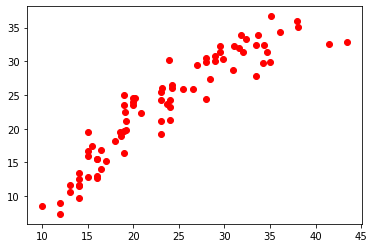

In [23]:
plt.scatter(y_test,y_pred,color='red')
plt.show()

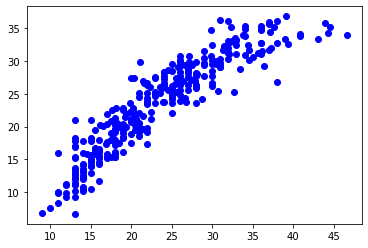

In [24]:
plt.scatter(y_train,rgu.predict(x_train),color='blue')
plt.show()

In [25]:
rgu.score(x_test,y_test)

0.8541445571155888

In [26]:
print(rgu.intercept_)
print(rgu.coef_)

-21.460262811015056
[ 1.75271654e-02 -2.54152524e-02 -6.04504862e-03  9.53968167e-02
  7.48093467e-01  6.74553427e+00  7.18906082e+00  3.73854961e+00
  5.13869905e+00 -7.63720817e-01 -2.71644527e+00]


In [27]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 9.149209054196001


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8541445571155888

# Using OLS method


In [29]:
import seaborn as sns

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [116]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mpg','displacement','horsepower','weight','acceleration','model year']

dataset[num_vars] = scaler.fit_transform(dataset[num_vars])

In [118]:
dataset.describe()

,mpg,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.386026,0.324098,0.317768,0.384867,0.450482,0.500838,0.512563,0.007538,0.211055,0.258794,0.175879,0.625628
std,0.207872,0.269431,0.207604,0.240103,0.164148,0.308136,0.500471,0.086601,0.408571,0.438523,0.381197,0.484569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.226064,0.093669,0.163043,0.173164,0.346726,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.372340,0.208010,0.266304,0.337539,0.446429,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.531915,0.501292,0.429348,0.565637,0.546131,0.750000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


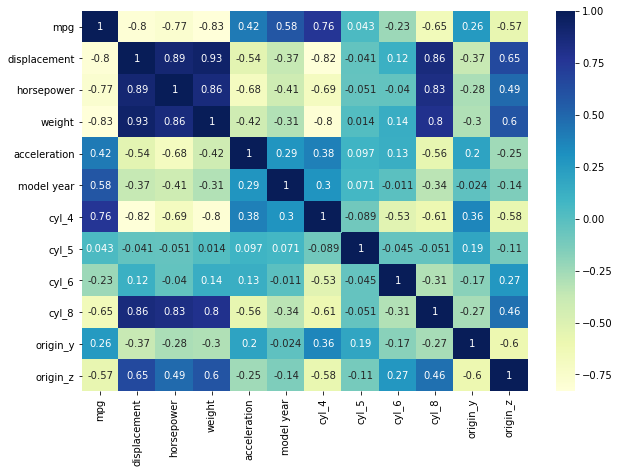

In [119]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),cmap="YlGnBu",annot=True)
plt.show()

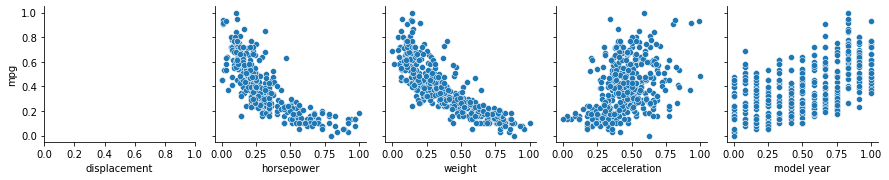

In [120]:
sns.pairplot(dataset,x_vars=['displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],y_vars=['mpg'])
plt.show()

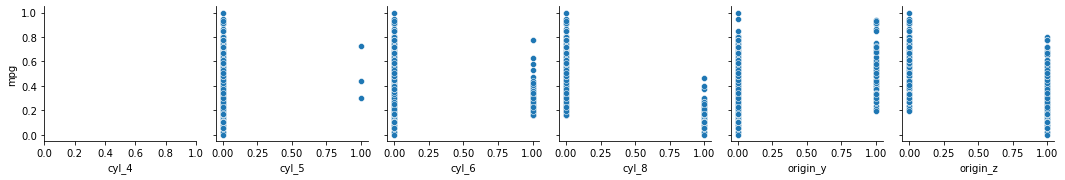

In [121]:
sns.pairplot(dataset,x_vars=[ 'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8', 'origin_y',
       'origin_z'],y_vars=['mpg'])
plt.show()

Performing Simple Linear Regression
Equation of linear regression
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

$y$ is the response
$c$ is the intercept
$m_1$ is the coefficient for the first feature
$m_n$ is the coefficient for the nth feature
In our case:

$y = c + m_1 \times cyl_4$

The $m$ values are called the model coefficients or model parameters.




Generic Steps in model building using statsmodels
We first assign the feature variable, cyl_4, in this case, to the variable X and the response variable, mpg, to the variable y.

In [160]:
x=dataset['cyl_4']
y=dataset['mpg']

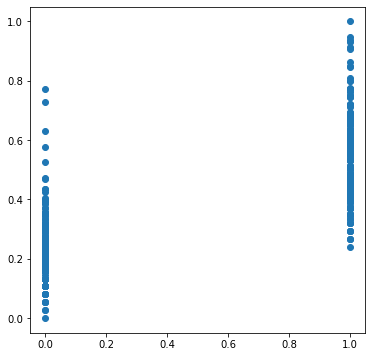

In [161]:
plt.figure(figsize=[6,6])
plt.scatter(dataset['cyl_4'],dataset['mpg'])
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [163]:
x_train.head(5)

149    1
118    1
287    0
187    0
190    0
Name: cyl_4, dtype: uint8

In [164]:
y_train.head()

149    0.398936
118    0.398936
287    0.199468
187    0.226064
190    0.146277
Name: mpg, dtype: float64

Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression

In [165]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [166]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()# Fit the resgression line using 'OLS'

In [167]:
lr.params# Print the parameters, i.e. the intercept and the slope of the regression line fitted

const    0.227837
cyl_4    0.314023
dtype: float64

In [168]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     403.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.90e-58
Time:                        17:17:38   Log-Likelihood:                 176.78
No. Observations:                 318   AIC:                            -349.6
Df Residuals:                     316   BIC:                            -342.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2278      0.011     20.243      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for cyl_4 is 11.80, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.561
Meaning that 56.1% of the variance in mpg is explained by cyl_4

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

mpg = 17.56+11.80*cyl_4

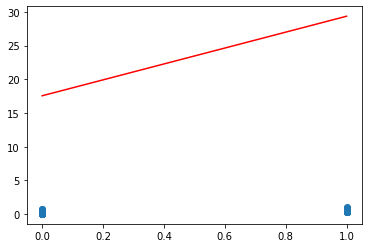

In [169]:
plt.scatter(x_train,y_train)
plt.plot(x_train,17.56+11.80*x_train,'r')
plt.show()

In [170]:
y_train_pred=lr.predict(x_train_sm)
res=y_train-y_train_pred

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


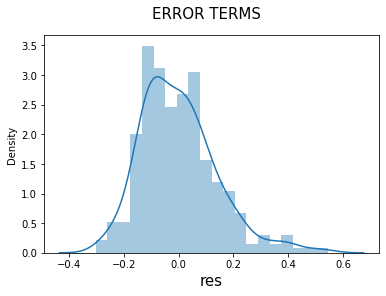

In [171]:
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle("ERROR TERMS",fontsize=15)
plt.xlabel("res",fontsize=15)
plt.show()

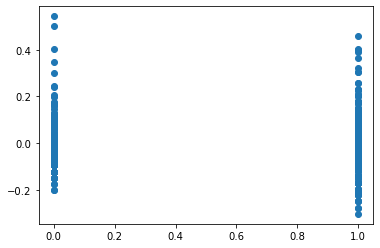

In [172]:
#Looking for patterns in the residuals
plt.scatter(x_train,res)
plt.show()

In [174]:
x=dataset[['cyl_4','model year']]
y=dataset['mpg']

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [176]:
x_train.head(5)

,cyl_4,model year
149,1,0.333333
118,1,0.250000
287,0,0.750000
187,0,0.500000
190,0,0.500000


In [180]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const         0.116082
cyl_4         0.265225
model year    0.273576
dtype: float64

In [178]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     387.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.32e-85
Time:                        17:21:46   Log-Likelihood:                 243.17
No. Observations:                 318   AIC:                            -480.3
Df Residuals:                     315   BIC:                            -469.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1161      0.013      9.171      0.0

In [179]:
x=dataset[['cyl_4','model year','acceleration']]
y=dataset['mpg']

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,cyl_4,model year,acceleration
149,1,0.333333,0.416667
118,1,0.250000,0.446429
287,0,0.750000,0.309524
187,0,0.500000,0.297619
190,0,0.500000,0.285714


In [182]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const           0.077777
cyl_4           0.253521
model year      0.263555
acceleration    0.111409
dtype: float64

In [183]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     265.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.06e-85
Time:                        17:24:33   Log-Likelihood:                 246.54
No. Observations:                 318   AIC:                            -485.1
Df Residuals:                     314   BIC:                            -470.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0778      0.019      4.015   

Adding all the variables to the model

In [290]:
x=dataset[['displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'cyl_4', 'cyl_5', 'cyl_6', 'cyl_8', 'origin_y',
       'origin_z']]
y=dataset['mpg']

In [291]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,acceleration,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
149,0.134367,0.277174,0.248370,0.416667,0.333333,1,0,0,0,0,0
118,0.124031,0.157609,0.154522,0.446429,0.250000,1,0,0,0,1,0
287,0.731266,0.500000,0.664020,0.309524,0.750000,0,0,0,1,0,1
187,0.612403,0.510870,0.737737,0.297619,0.500000,0,0,0,1,0,1
190,0.731266,0.576087,0.737737,0.285714,0.500000,0,0,0,1,0,1


In [292]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const           0.348180
displacement    0.171023
horsepower     -0.114777
weight         -0.579926
acceleration    0.020331
model year      0.246613
cyl_4           0.183833
cyl_5           0.197958
cyl_6           0.105896
cyl_8           0.151274
origin_y       -0.021807
origin_z       -0.068108
dtype: float64

In [293]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     146.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          5.63e-115
Time:                        18:44:38   Log-Likelihood:                 337.94
No. Observations:                 318   AIC:                            -651.9
Df Residuals:                     306   BIC:                            -606.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3482      0.052      6.737   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

Checking VIF
Variance Inflation Factor or VIF, gives a basic  idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $¶quantitative

# Checking VIF


In [294]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,53.24
2,weight,39.35
8,cyl_8,26.85
1,horsepower,24.53
5,cyl_4,19.40
3,acceleration,18.14
7,cyl_6,11.86
10,origin_z,7.05
4,model year,4.55
9,origin_y,2.34


Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.


In [296]:
x=x.drop(['acceleration'],axis=1)

In [297]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_y,origin_z
149,0.134367,0.277174,0.248370,0.333333,1,0,0,0,0,0
118,0.124031,0.157609,0.154522,0.250000,1,0,0,0,1,0
287,0.731266,0.500000,0.664020,0.750000,0,0,0,1,0,1
187,0.612403,0.510870,0.737737,0.500000,0,0,0,1,0,1
190,0.731266,0.576087,0.737737,0.500000,0,0,0,1,0,1


In [298]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const           0.357230
displacement    0.168426
horsepower     -0.132189
weight         -0.567810
model year      0.245903
cyl_4           0.186529
cyl_5           0.201149
cyl_6           0.108208
cyl_8           0.152411
origin_y       -0.021812
origin_z       -0.068334
dtype: float64

In [299]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          4.72e-116
Time:                        18:44:39   Log-Likelihood:                 337.85
No. Observations:                 318   AIC:                            -653.7
Df Residuals:                     307   BIC:                            -612.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3572      0.047      7.577   

In [300]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,51.88
2,weight,31.56
7,cyl_8,22.71
1,horsepower,19.11
4,cyl_4,7.57
6,cyl_6,7.50
9,origin_z,7.05
3,model year,4.55
8,origin_y,2.34
5,cyl_5,1.31


In [301]:
#removing origin_y

In [302]:
x=x.drop(['origin_y'],axis=1)

In [303]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,cyl_6,cyl_8,origin_z
149,0.134367,0.277174,0.248370,0.333333,1,0,0,0,0
118,0.124031,0.157609,0.154522,0.250000,1,0,0,0,0
287,0.731266,0.500000,0.664020,0.750000,0,0,0,1,1
187,0.612403,0.510870,0.737737,0.500000,0,0,0,1,1
190,0.731266,0.576087,0.737737,0.500000,0,0,0,1,1


In [304]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())


const           0.357566
displacement    0.178149
horsepower     -0.128953
weight         -0.583911
model year      0.250703
cyl_4           0.173688
cyl_5           0.179631
cyl_6           0.096984
cyl_8           0.142119
origin_z       -0.057412
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          8.24e-117
Time:                        18:44:40   Log-Likelihood:                 336.93
No. Observations:                 318   AIC:                            -653.9
Df Residuals:                     308   BIC:                            -616.2
Df Model:                           9                                         
Covariance Type:        

In [305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,51.49
2,weight,30.27
7,cyl_8,22.07
1,horsepower,19.07
6,cyl_6,6.90
4,cyl_4,5.54
8,origin_z,5.23
3,model year,4.35
5,cyl_5,1.21


In [306]:
#removing cyl_6

In [307]:
x=x.drop(['cyl_6'],axis=1)

In [308]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,cyl_8,origin_z
149,0.134367,0.277174,0.248370,0.333333,1,0,0,0
118,0.124031,0.157609,0.154522,0.250000,1,0,0,0
287,0.731266,0.500000,0.664020,0.750000,0,0,1,1
187,0.612403,0.510870,0.737737,0.500000,0,0,1,1
190,0.731266,0.576087,0.737737,0.500000,0,0,1,1


In [309]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const           0.432662
displacement    0.244944
horsepower     -0.156217
weight         -0.585755
model year      0.251358
cyl_4           0.096079
cyl_5           0.096918
cyl_8           0.036601
origin_z       -0.056834
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          3.40e-117
Time:                        18:44:44   Log-Likelihood:                 335.07
No. Observations:                 318   AIC:                            -652.1
Df Residuals:                     309   BIC:                            -618.3
Df Model:                           8                                         
Covariance Type:            nonrobust            

In [310]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,42.42
2,weight,28.78
1,horsepower,19.05
6,cyl_8,5.41
7,origin_z,5.15
3,model year,3.89
4,cyl_4,3.09
5,cyl_5,1.09


In [311]:
#removing cyl_8

In [312]:
x=x.drop(['cyl_8'],axis=1)

In [313]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,cyl_5,origin_z
149,0.134367,0.277174,0.248370,0.333333,1,0,0
118,0.124031,0.157609,0.154522,0.250000,1,0,0
287,0.731266,0.500000,0.664020,0.750000,0,0,1
187,0.612403,0.510870,0.737737,0.500000,0,0,1
190,0.731266,0.576087,0.737737,0.500000,0,0,1


In [314]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const           0.416783
displacement    0.301708
horsepower     -0.139787
weight         -0.585737
model year      0.251790
cyl_4           0.103974
cyl_5           0.097926
origin_z       -0.060575
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          6.91e-118
Time:                        18:44:56   Log-Likelihood:                 333.88
No. Observations:                 318   AIC:                            -651.8
Df Residuals:                     310   BIC:                            -621.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                     

In [315]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,34.42
2,weight,28.35
1,horsepower,18.78
6,origin_z,4.83
3,model year,3.80
4,cyl_4,3.08
5,cyl_5,1.09


In [316]:
#removing cyl_5

In [317]:
x=x.drop(['cyl_5'],axis=1)

In [318]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,displacement,horsepower,weight,model year,cyl_4,origin_z
149,0.134367,0.277174,0.248370,0.333333,1,0
118,0.124031,0.157609,0.154522,0.250000,1,0
287,0.731266,0.500000,0.664020,0.750000,0,1
187,0.612403,0.510870,0.737737,0.500000,0,1
190,0.731266,0.576087,0.737737,0.500000,0,1


In [319]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const           0.424367
displacement    0.287936
horsepower     -0.145373
weight         -0.573116
model year      0.253691
cyl_4           0.096703
origin_z       -0.064605
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.31e-118
Time:                        18:45:04   Log-Likelihood:                 332.10
No. Observations:                 318   AIC:                            -650.2
Df Residuals:                     311   BIC:                            -623.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   c

In [320]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,displacement,34.07
2,weight,27.49
1,horsepower,18.76
5,origin_z,4.76
3,model year,3.72
4,cyl_4,3.02


In [287]:
x=x.drop(['displacement'],axis=1)

In [288]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)
x_train.head(5)

,horsepower,weight,model year,cyl_4,origin_z
149,0.277174,0.248370,0.333333,1,0
118,0.157609,0.154522,0.250000,1,0
287,0.500000,0.664020,0.750000,0,1
187,0.510870,0.737737,0.500000,0,1
190,0.576087,0.737737,0.500000,0,1


In [289]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.params)
print(lr.summary())

const         0.428225
horsepower   -0.024456
weight       -0.434721
model year    0.244271
cyl_4         0.072720
origin_z     -0.040921
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.4
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          8.29e-116
Time:                        18:43:53   Log-Likelihood:                 323.10
No. Observations:                 318   AIC:                            -634.2
Df Residuals:                     312   BIC:                            -611.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [322]:
y_train_pred=lr.predict(x_train_sm)

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

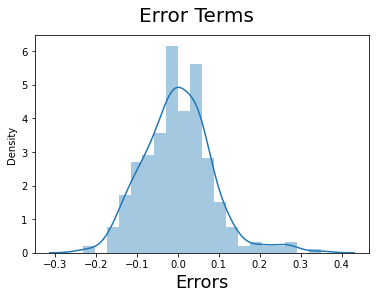

In [323]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

 Model Evaluation

In [324]:
x_test_sm=sm.add_constant(x_test)

In [325]:
y_pred=lr.predict(x_test_sm)

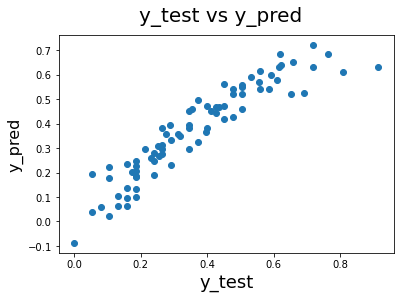

In [328]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [330]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.31e-118
Time:                        18:56:16   Log-Likelihood:                 332.10
No. Observations:                 318   AIC:                            -650.2
Df Residuals:                     311   BIC:                            -623.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4244      0.024     17.923   